In [51]:
import librosa
audio_path = 'v.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [52]:
x.shape

(529200,)

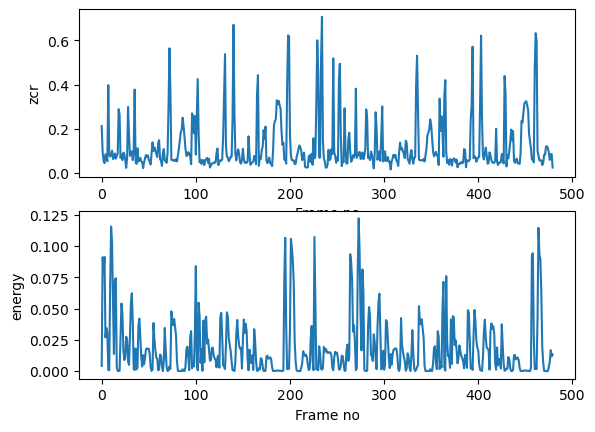

In [78]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt
[Fs, x] = audioBasicIO.read_audio_file(audio_path)
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, int(0.1*Fs), int(0.1*Fs))
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [79]:
F.shape

(68, 480)

In [67]:
F.min()

-32.14312507455533

In [68]:
Fs

16000

In [88]:
lff = librosa.feature.melspectrogram(y=y, sr=sr,hop_length=int(0.069*Fs),n_fft=int(0.069*Fs))

In [89]:
lff.shape

(128, 480)

In [77]:
lff[0].shape

(662,)

In [49]:
124/2

62.0

In [91]:
F.shape

(68, 480)

In [92]:
lff.shape

(128, 480)

In [97]:
import numpy as np

In [98]:
emb = np.vstack((F,lff))

In [99]:
emb.shape

(196, 480)

In [93]:
F.min()

-32.14312507455533

In [94]:
F.max()

8.478153316354483

In [95]:
lff.min()

3.8094477e-19

In [96]:
lff.max()

29.988106